In [ ]:
!pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import random

# Replace with your own Spotify API credentials
client_id = '8de6e087a13347d6b382c7556d7a5969'
client_secret = '51d8d7b411f341ea92dbce0f985f6d05'

# Authenticate with Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Number of songs to collect
num_songs = 5000

# List to store song data
song_data = []

# Loop to fetch data for each song
for _ in range(num_songs):
    # Generate a random year between 1900 and 2020
    random_year = random.randint(1900, 2020)

    # Construct a search query for songs from the random year
    search_query = f'year:{random_year}'

    # Fetch track data with the search query
    track_data = sp.search(q=search_query, type='track', limit=1)['tracks']['items'][0]
    track_id = track_data['id']

    audio_features = sp.audio_features(track_id)[0]
    track_info = {
        'Track ID': track_id,
        'Track Name': track_data['name'],
        'Year': random_year,
        'Acousticness': audio_features['acousticness'],
        'Danceability': audio_features['danceability'],
        'Energy': audio_features['energy'],
        'Instrumentalness': audio_features['instrumentalness'],
        'Key': audio_features['key'],
        'Liveness': audio_features['liveness'],
        'Loudness': audio_features['loudness'],
        'Mode': audio_features['mode'],
        'Speechiness': audio_features['speechiness'],
        'Tempo': audio_features['tempo'],
        'Time Signature': audio_features['time_signature'],
        'Valence': audio_features['valence']
    }
    song_data.append(track_info)

# Create a pandas DataFrame
df = pd.DataFrame(song_data)

# Print the DataFrame
print(df)

                    Track ID               Track Name  Year  Acousticness  \
0     0JXXNGljqupsJaZsgSbMZV               Sure Thing  2010      0.026700   
1     7rbECVPkY5UODxoOUVKZnA                 I Wonder  2007      0.141000   
2     5NGtFXVpXSvwunEIGeviY3         Gymnopédie No. 1  1949      0.994000   
3     648TTtYB0bH0P8Hfy0FmkL            Unforgettable  1954      0.920000   
4     61znp1Iy11bdJ2YAbwaqw7         Sing, Sing, Sing  1928      0.847000   
...                      ...                      ...   ...           ...   
4995  1xe8jI4hPQUOfXUSxcPJdo         Run, Rabbit Run!  1932      0.936000   
4996  5NGtFXVpXSvwunEIGeviY3         Gymnopédie No. 1  1949      0.994000   
4997  7rbECVPkY5UODxoOUVKZnA                 I Wonder  2007      0.141000   
4998  7BY005dacJkbO6EPiOh2wb  House Of The Rising Sun  1964      0.000385   
4999  1TrGdXSgiBm8W68D2K1COG         Cross Road Blues  1937      0.930000   

      Danceability  Energy  Instrumentalness  Key  Liveness  Loudness  Mode

In [ ]:
df.to_csv('music_data.csv', index=False)

EDA (Referring to solely music_data_valence.csv)

In [ ]:
import pandas as pd

df = pd.read_csv('music_data.csv',header=None)
#df.head()
# Set the column names to the values from the first row
df.columns = df.iloc[0]

# Drop the first row (header row) since it's now used as column names
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)


In [ ]:
df.describe()

,Track ID,Track Name,Year,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,121,121,121,113,108,114,97,12,111,121,2,112,121,3,108
top,7eQvNx18Y5nQLPQ3KCkkIc,Shine On Harvest Moon,1908,0.994,0.741,0.466,0.0,0,0.105,-15.285,1,0.136,129.905,4,0.47
freq,64,64,64,172,105,93,1063,768,114,64,3686,88,64,4253,101


0
Track ID            0
Track Name          0
Year                0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
Time Signature      0
Valence             0
dtype: int64


<ipython-input-4-b4c84b9ce557>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


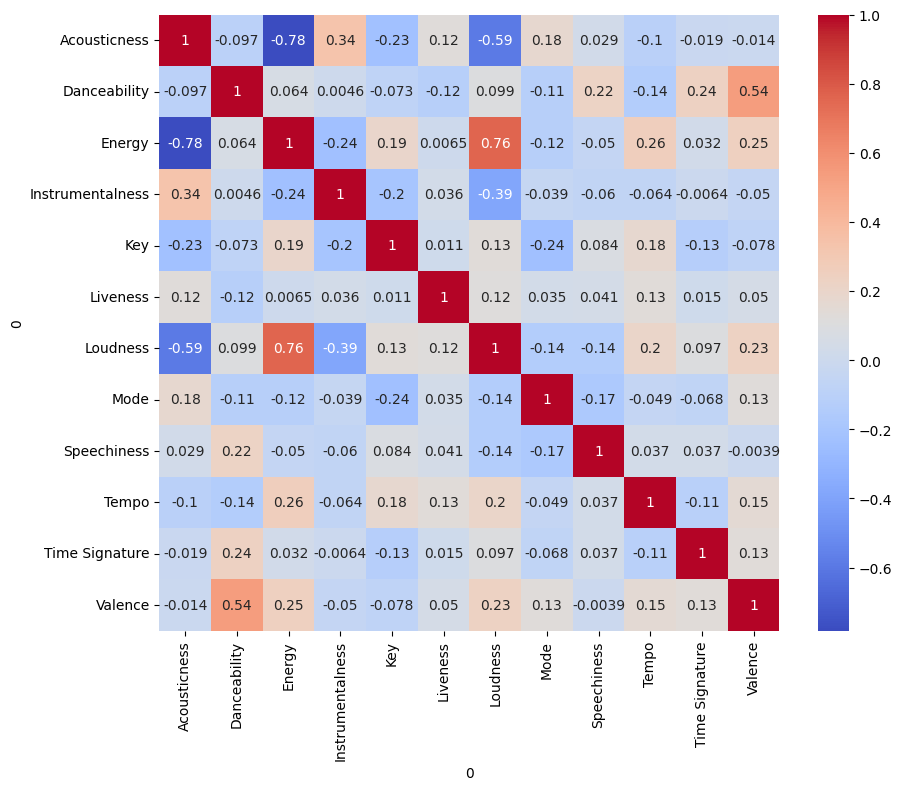

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing data
print(df.isnull().sum())

# Ensure numeric data types
numeric_columns = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Key',
                   'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence']

# Convert the numeric columns to numeric data types, handling errors by converting to NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in the numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


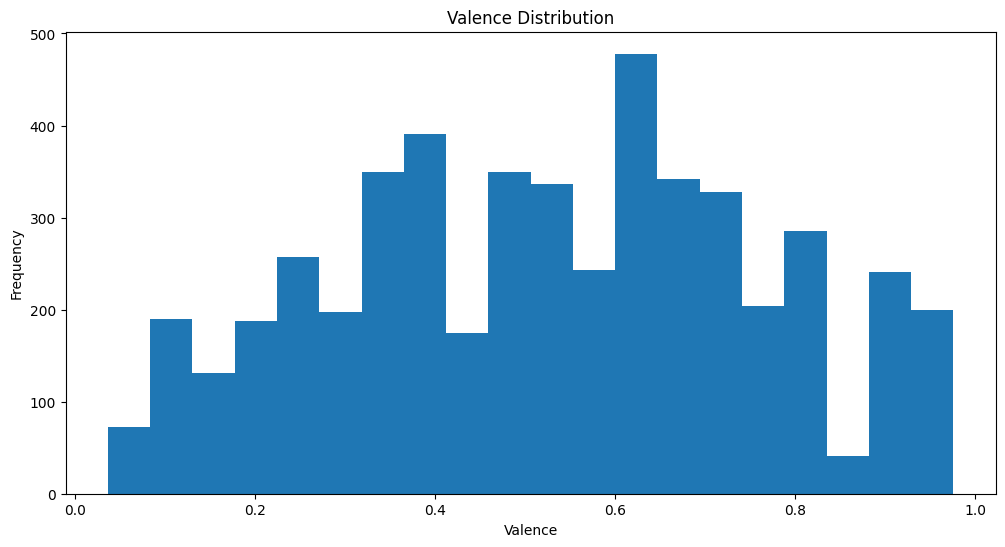

In [ ]:
plt.figure(figsize=(12, 6))
df['Valence'].plot(kind='hist', bins=20, title='Valence Distribution')
plt.xlabel('Valence')
plt.show()

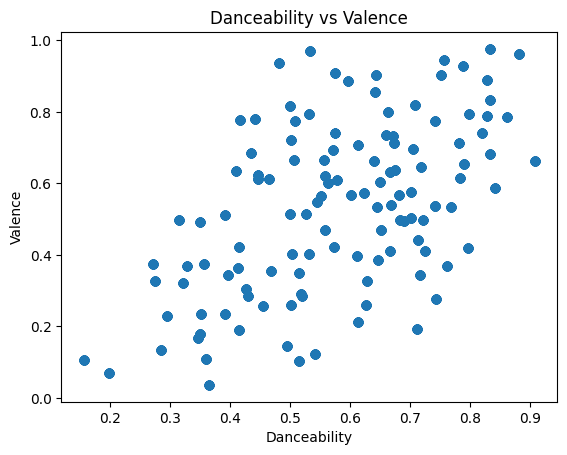

In [ ]:
plt.scatter(df['Danceability'], df['Valence'])
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Danceability vs Valence')
plt.show()

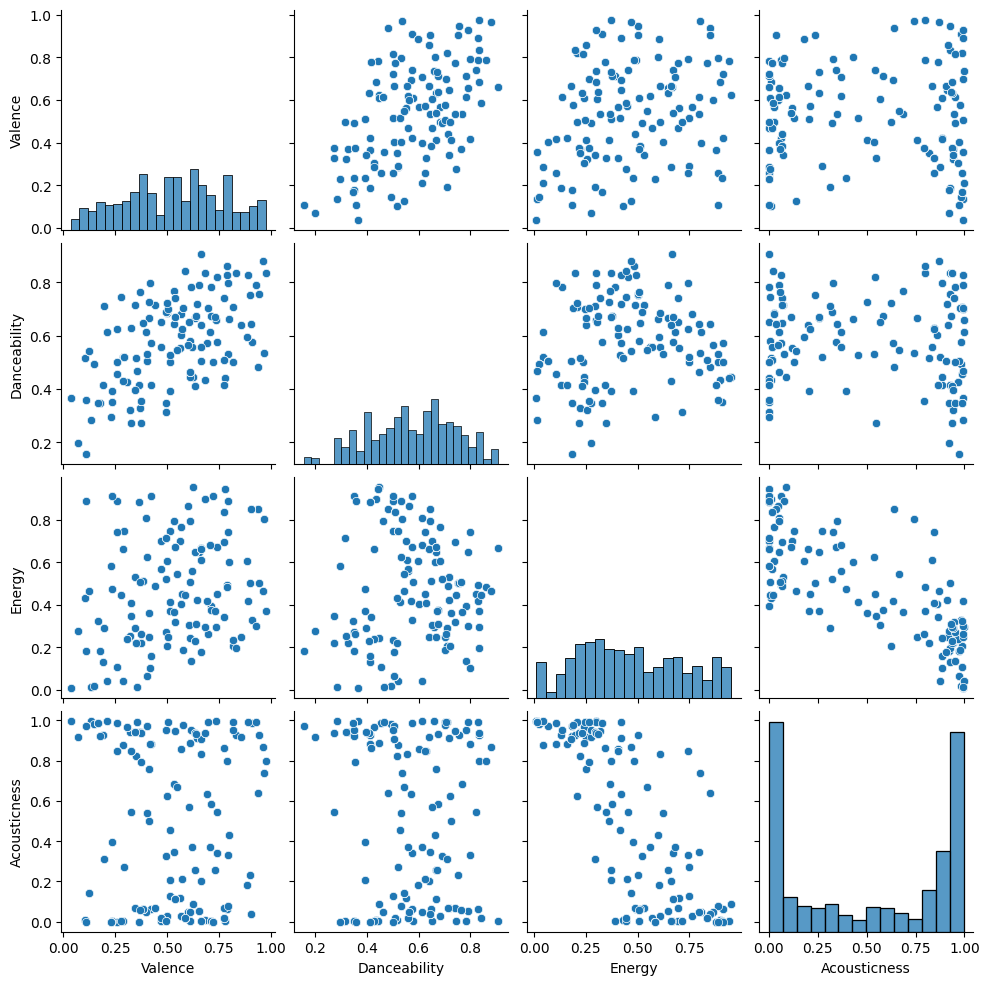

In [ ]:
sns.pairplot(df[['Valence', 'Danceability', 'Energy', 'Acousticness']])
plt.show()

# Predictive Algorithms along with corresponding feature importance/coefficients

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
X = df.drop(['Track ID', 'Track Name', 'Valence'], axis=1)
y = df['Valence']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Get absolute value of coefficients as feature importances
feature_importances = np.abs(model.coef_)

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)


             Feature  Importance
2       Danceability    0.838606
3             Energy    0.594042
9        Speechiness    0.240469
1       Acousticness    0.190728
6           Liveness    0.118199
4   Instrumentalness    0.096856
8               Mode    0.090328
12           Cluster    0.033333
11    Time Signature    0.009678
13            Decade    0.003681
0               Year    0.003438
7           Loudness    0.003021
5                Key    0.001705
10             Tempo    0.001052
Mean Absolute Error: 0.13212489629284271
Mean Squared Error: 0.025348215970903698
Root Mean Squared Error: 0.15921123066826567
R-squared: 0.5707186141799498


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
X = df.drop(['Track ID', 'Track Name', 'Valence'], axis=1)
y = df['Valence']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model on the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)


             Feature  Importance
2       Danceability    0.311105
3             Energy    0.129748
0               Year    0.087317
9        Speechiness    0.077005
12           Cluster    0.074457
10             Tempo    0.071620
4   Instrumentalness    0.061553
6           Liveness    0.060945
1       Acousticness    0.049906
5                Key    0.032723
7           Loudness    0.030848
13            Decade    0.007999
8               Mode    0.002465
11    Time Signature    0.002309
Mean Absolute Error: 6.008527009271347e-16
Mean Squared Error: 6.009789280192538e-31
Root Mean Squared Error: 7.752283070291318e-16
R-squared: 1.0


Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
X = df.drop(['Track ID', 'Track Name', 'Valence'], axis=1)
y = df['Valence']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Regression model with linear kernel
model = SVR(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Get coefficients (feature weights) from the linear SVR model
coefficients = model.coef_[0]

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Display feature importances
print(importance_df)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)


             Feature  Coefficient
3             Energy   -48.369812
1       Acousticness    41.831698
9        Speechiness    30.867276
6           Liveness    28.939894
11    Time Signature   -25.085239
2       Danceability    17.230422
8               Mode   -13.729371
12           Cluster     6.202926
4   Instrumentalness     2.008623
13            Decade     1.526462
0               Year    -0.917038
7           Loudness     0.868820
5                Key     0.269484
10             Tempo    -0.224999
Mean Absolute Error: 19.644027639375555
Mean Squared Error: 560.1433193475794
Root Mean Squared Error: 23.66734711258487
R-squared: -9485.23369247706


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
X = df.drop(['Track ID', 'Track Name', 'Valence'], axis=1)
y = df['Valence']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
model = Ridge(alpha=1.0)

# Train the model on the training data
model.fit(X_train, y_train)

# Get coefficients (feature weights) from the Ridge model
coefficients = model.coef_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients[0]})
importance_df = importance_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Display feature importances
print(importance_df)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

             Feature  Coefficient
0               Year     0.003442
1       Acousticness     0.003442
2       Danceability     0.003442
3             Energy     0.003442
4   Instrumentalness     0.003442
5                Key     0.003442
6           Liveness     0.003442
7           Loudness     0.003442
8               Mode     0.003442
9        Speechiness     0.003442
10             Tempo     0.003442
11    Time Signature     0.003442
12           Cluster     0.003442
13            Decade     0.003442
Mean Absolute Error: 0.1320863893247829
Mean Squared Error: 0.025391065565056083
Root Mean Squared Error: 0.15934574222443498
R-squared: 0.569992940500166


# Analysis time trends and mood transitions

Collect Valence and Year Data

In [ ]:
# List to store valence and year data
valence_data = []

# Loop through the existing DataFrame to get valence and year data
for index, row in df.iterrows():
    random_year = row['Year']
    valence_year_info = {
        'Year': random_year,
        'Valence': row['Valence']
    }
    valence_data.append(valence_year_info)

# Create a DataFrame for valence and year data
valence_df = pd.DataFrame(valence_data)

# Print the DataFrame
valence_df

,Year,Valence
0,2010,0.498
1,2007,0.124
2,1949,0.356
3,1954,0.178
4,1928,0.259
...,...,...
4995,1932,0.682
4996,1949,0.356
4997,2007,0.124
4998,1964,0.228


Analyze Valence Trends Over Time

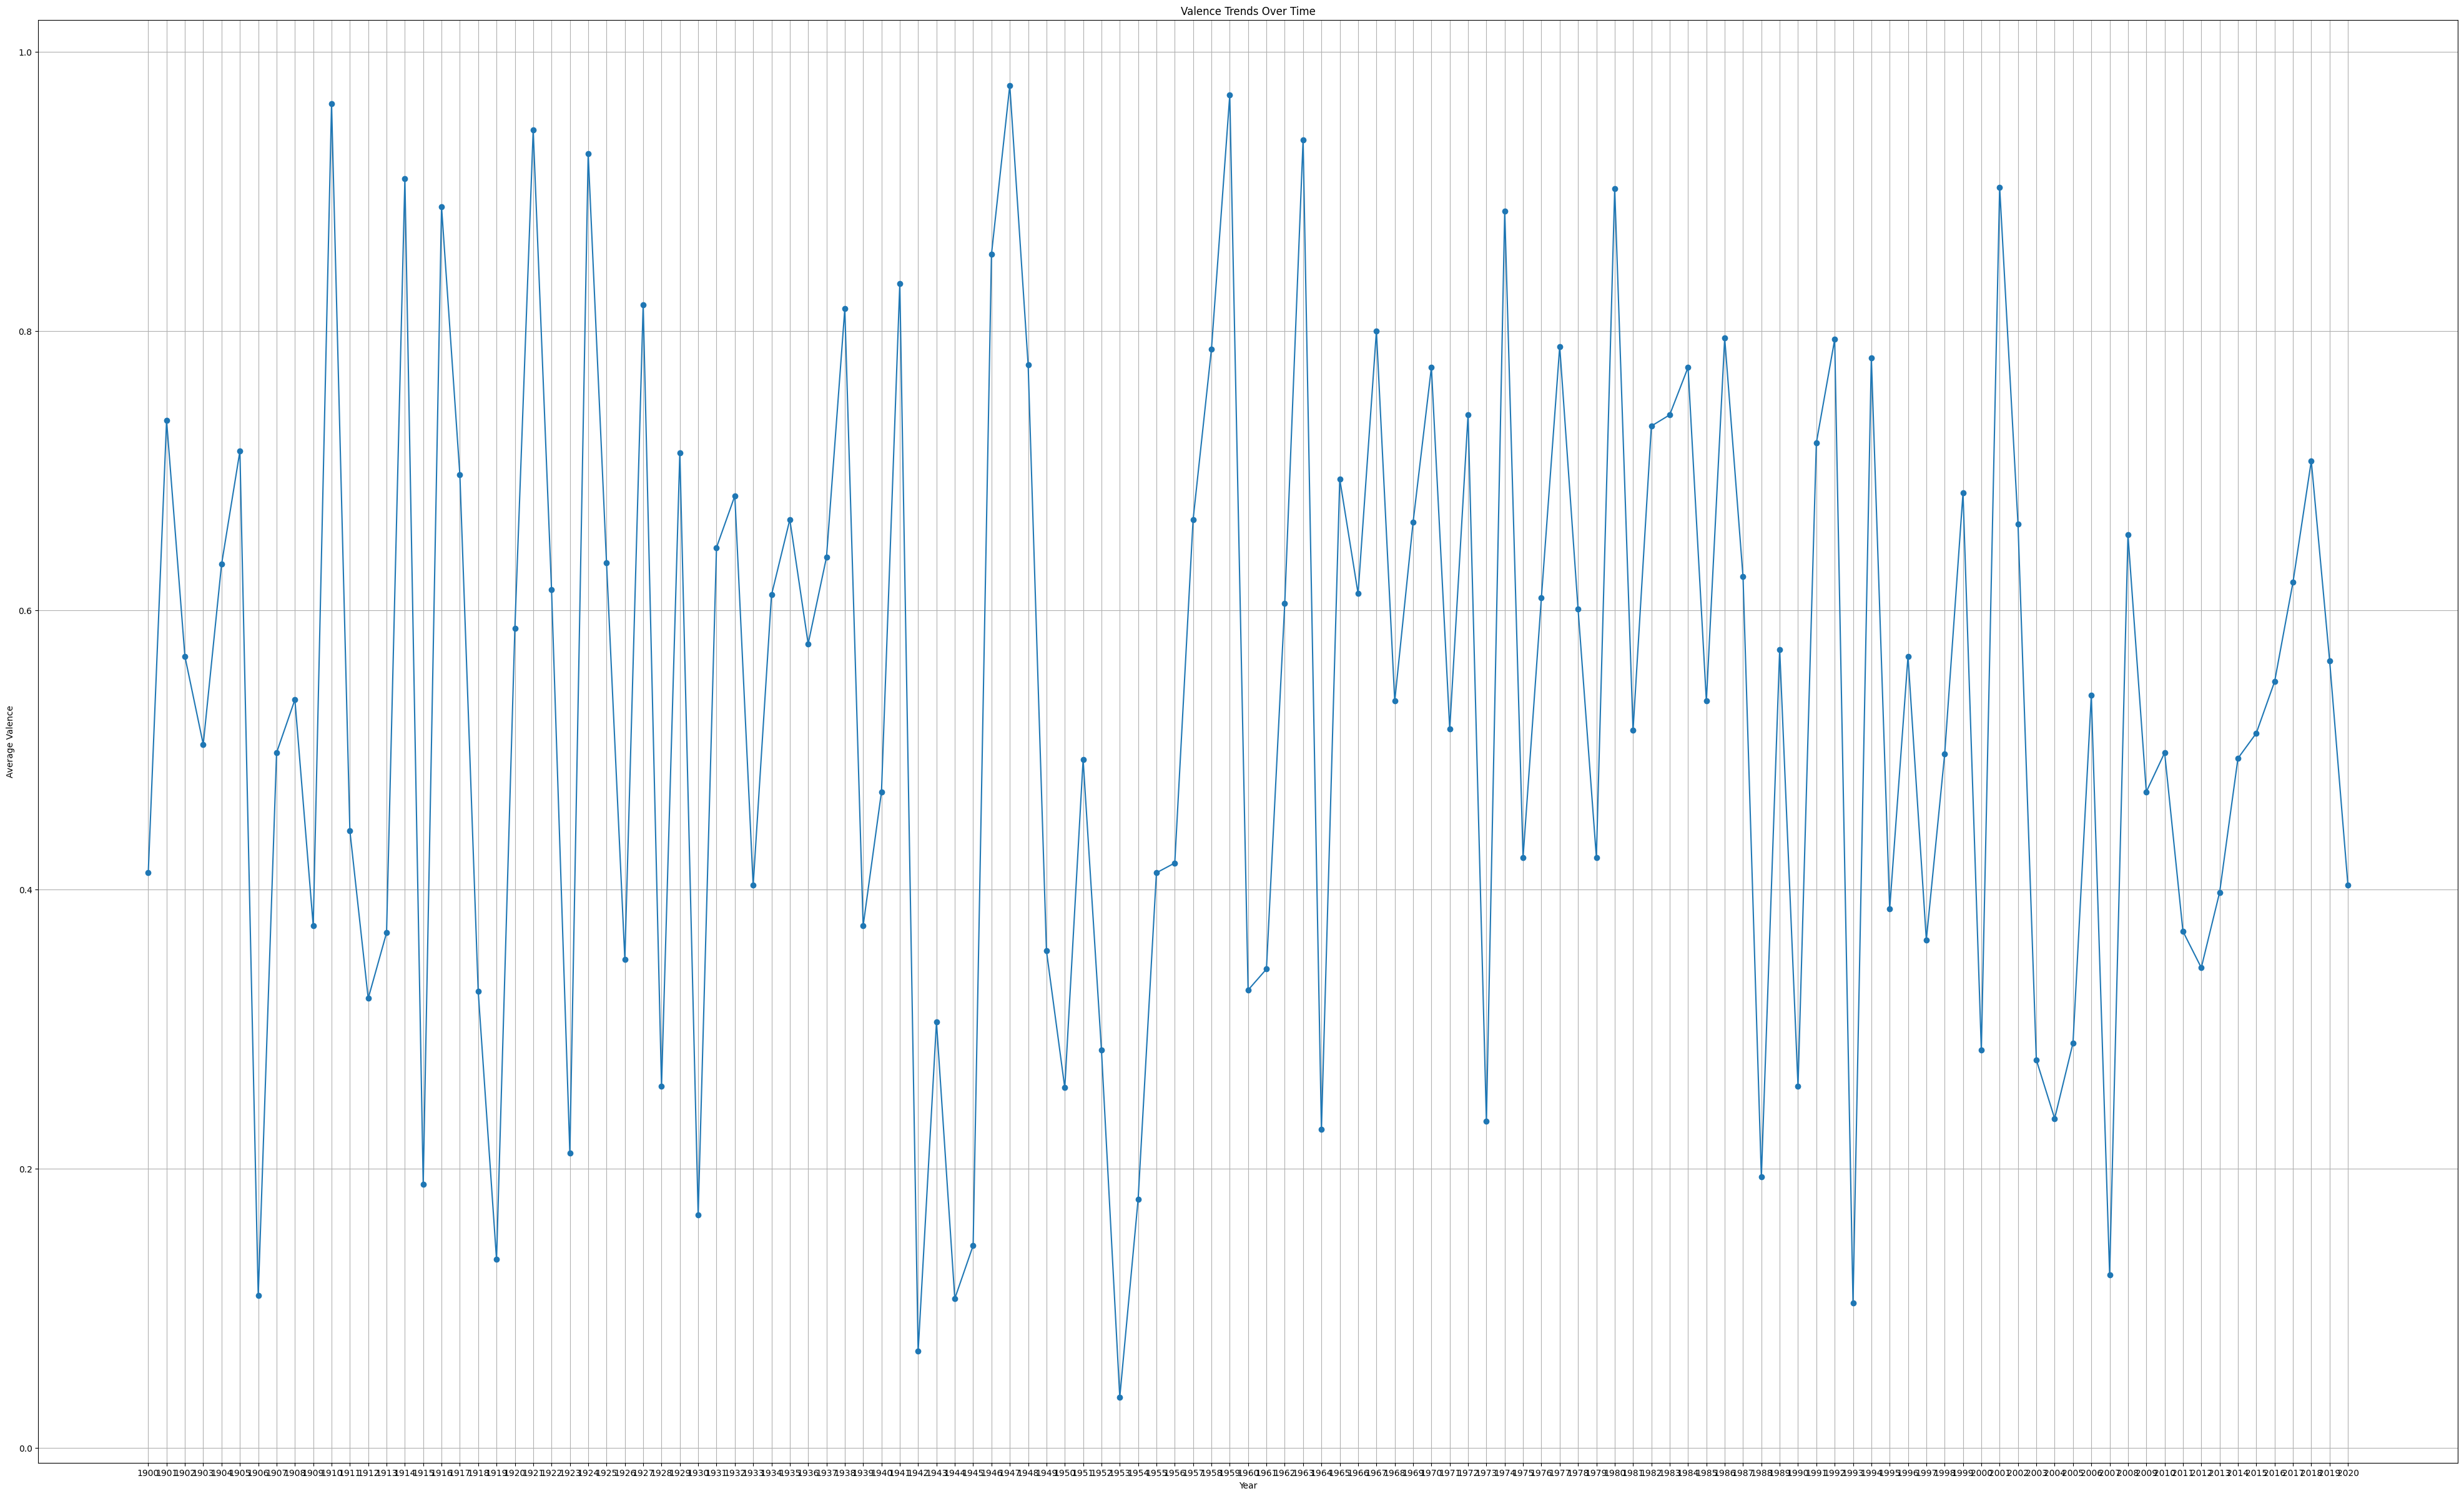

In [ ]:
# Group data by year and calculate mean valence for each year
valence_mean_by_year = valence_df.groupby('Year')['Valence'].mean()

# Plot the valence trends over time
plt.figure(figsize=(50, 30))
plt.plot(valence_mean_by_year.index, valence_mean_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.title('Valence Trends Over Time')
plt.grid(True)
plt.show()

Analyze Valence Transitions Within Randomised Playlists

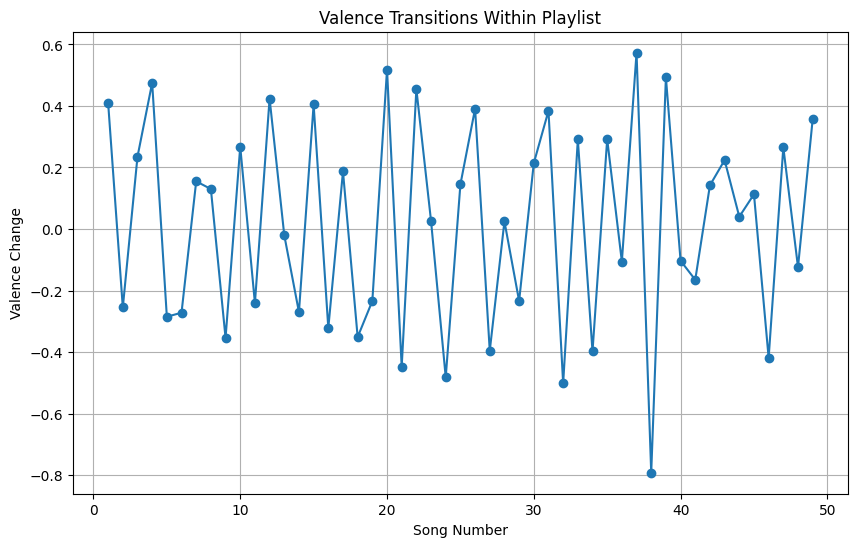

In [ ]:
import random

# Select 50 random songs
random_song_indices = random.sample(range(len(df)), 50)
random_songs = df.iloc[random_song_indices]

# Extract valence values into a list
valence_scores = random_songs['Valence'].tolist()


# Calculate the changes in valence between consecutive songs
valence_changes = [valence_scores[i+1] - valence_scores[i] for i in range(len(valence_scores)-1)]

# Plot the valence transitions within the playlist
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(valence_scores)), valence_changes, marker='o')
plt.xlabel('Song Number')
plt.ylabel('Valence Change')
plt.title('Valence Transitions Within Playlist')
plt.grid(True)
plt.show()

# K-means clustering and visualisation of the clusters using PCA along decade-wise analysis and visualisation for each decade

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


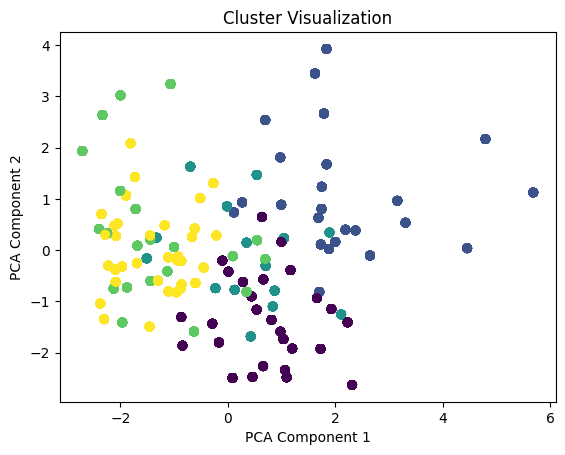

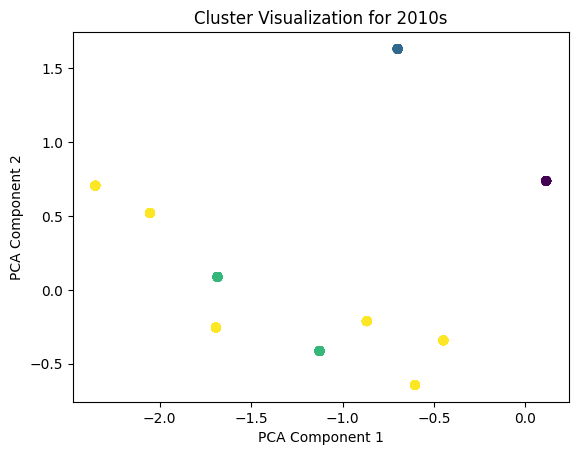

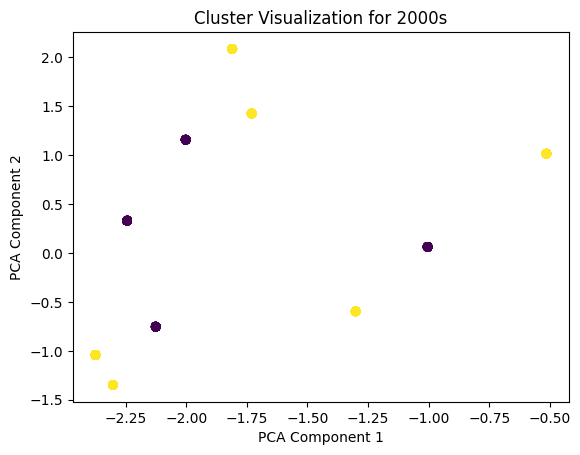

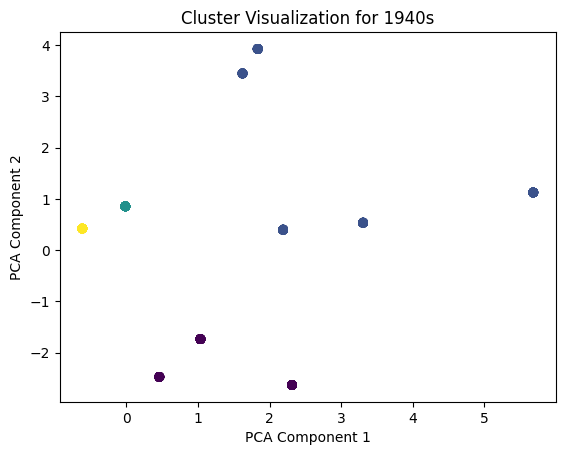

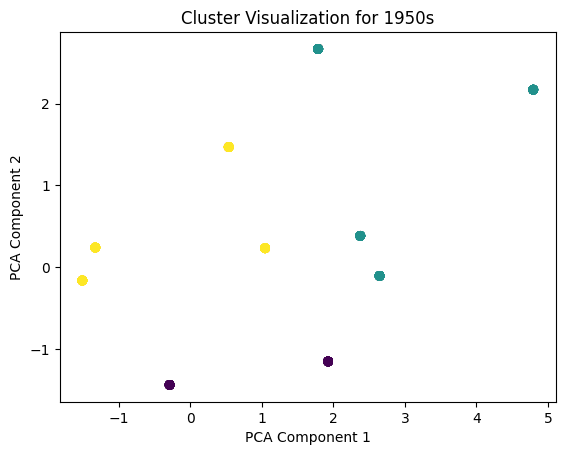

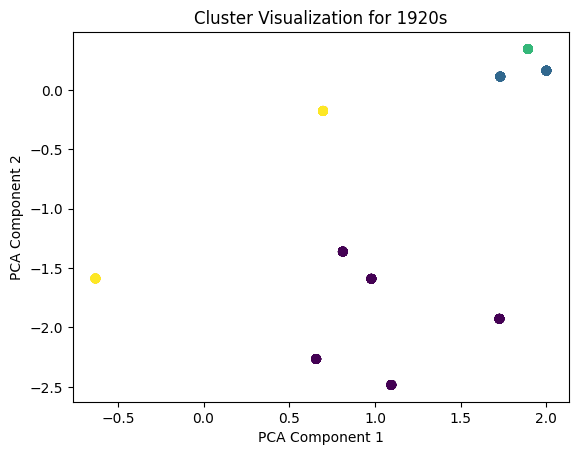

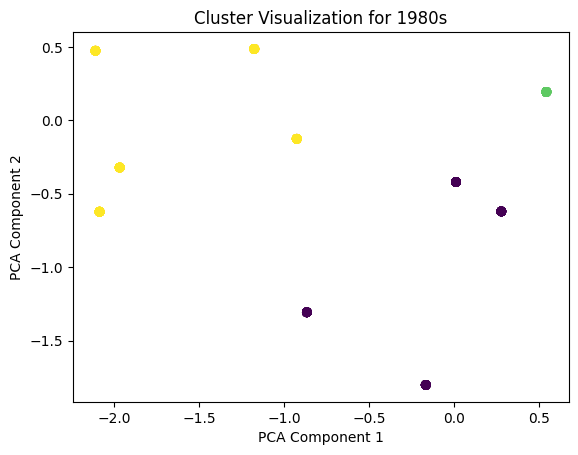

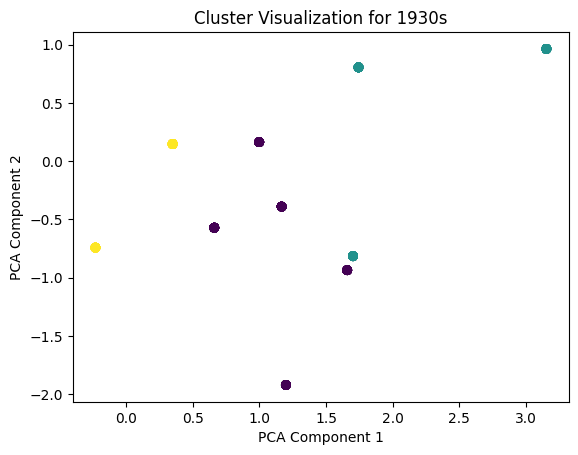

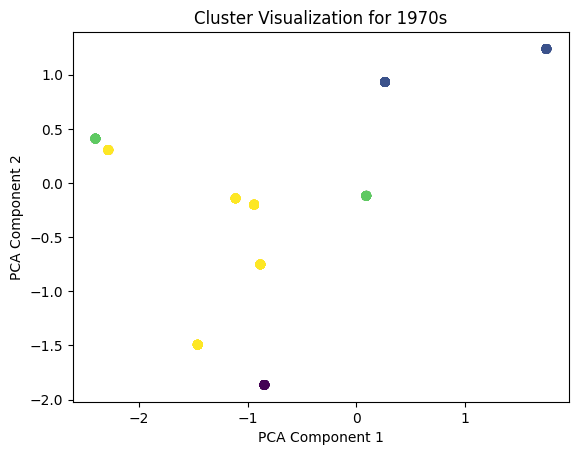

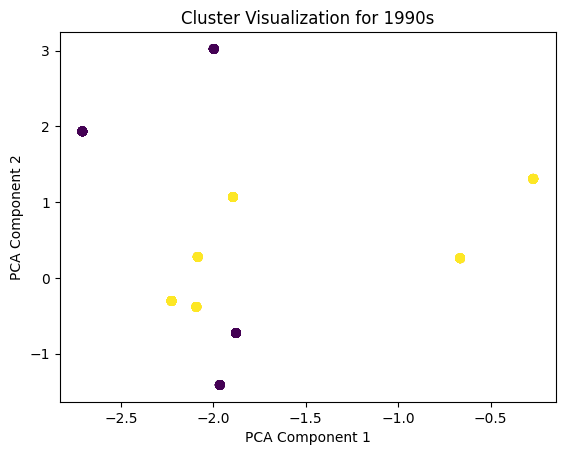

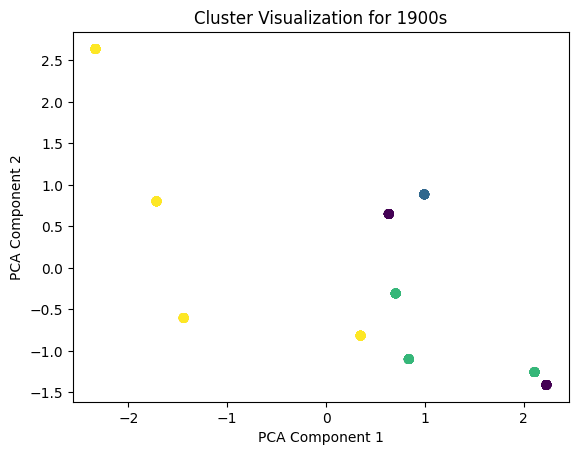

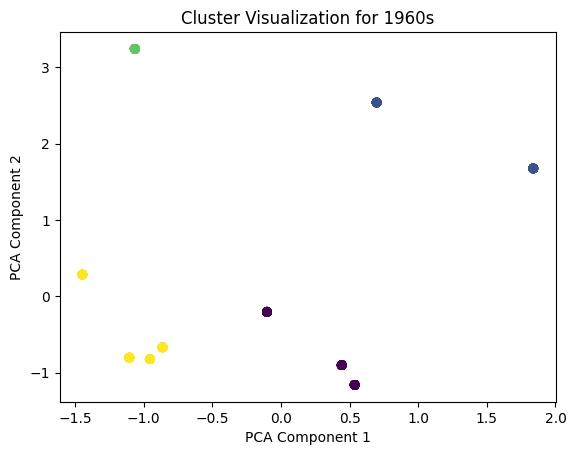

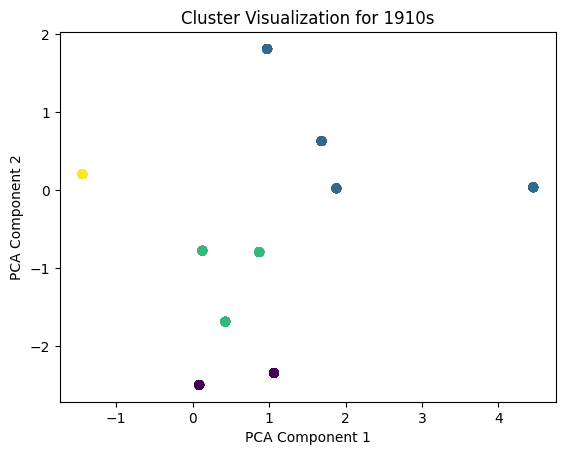

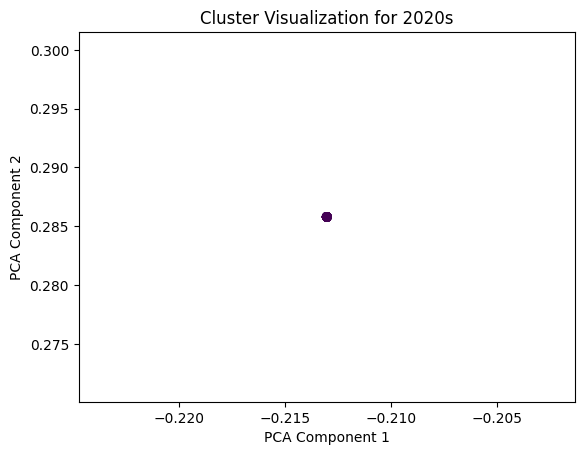

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert 'Year' column to integer
df['Year'] = df['Year'].astype(int)

# Select relevant numerical features for clustering
features = df[['Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
               'Key', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
               'Tempo', 'Time Signature', 'Valence']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Visualize clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Decade-wise analysis
df['Decade'] = (df['Year'] // 10) * 10
for decade in df['Decade'].unique():
    subset = df[df['Decade'] == decade]

    # Perform clustering for the subset
    subset_features = subset[['Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                              'Key', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
                              'Tempo', 'Time Signature', 'Valence']]

    subset_scaled_features = scaler.transform(subset_features)
    subset_clusters = kmeans.predict(subset_scaled_features)

    # Visualize clusters for the subset
    subset_reduced_features = pca.transform(subset_scaled_features)
    plt.scatter(subset_reduced_features[:, 0], subset_reduced_features[:, 1], c=subset_clusters, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Cluster Visualization for {decade}s')
    plt.show()

# Interpret and analyze the results
# Discuss patterns and trends in musical features over time
# Summarize findings in the conclusion


In [ ]:
# Interpret and analyze the results
for decade in df['Decade'].unique():
    subset = df[df['Decade'] == decade]

    # Analyze the cluster distribution for the subset
    cluster_distribution = subset['Cluster'].value_counts(normalize=True)
    print(f"Decade: {decade}s")
    print("Cluster Distribution:")
    print(cluster_distribution)

    # Analyze the mean values of features for each cluster
    cluster_mean_features = subset.groupby('Cluster')[['Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                                                       'Key', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
                                                       'Tempo', 'Time Signature', 'Valence']].mean()
    print("Cluster Mean Features:")
    print(cluster_mean_features)


Decade: 2010s
Cluster Distribution:
4    0.577396
3    0.223587
2    0.108108
1    0.090909
Name: Cluster, dtype: float64
Cluster Mean Features:
0        Acousticness  Danceability    Energy  Instrumentalness        Key  \
Cluster                                                                      
1            0.205000      0.392000  0.370000          0.009600   9.000000   
2            0.667000      0.545000  0.545000          0.000055   9.000000   
3            0.180251      0.687099  0.562582          0.000148  10.483516   
4            0.164907      0.637719  0.629587          0.003463   6.855319   

0        Liveness   Loudness  Mode  Speechiness       Tempo  Time Signature  \
Cluster                                                                       
1        0.082100 -10.888000   1.0     0.029800   48.718000             4.0   
2        0.417000  -7.362000   1.0     0.107000  159.940000             3.0   
3        0.119932  -8.315516   0.0     0.223440   90.828132           